# British Airways DataProblem Task 1

## Data Collection

In [199]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import os

In [58]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

reviews = []
stars = []
date = []
country = []

In [60]:
for i in range(1, 41):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    for item in soup.find_all("time"):
        date.append(item.text)

    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 34
Error on page 35
Error on page 35
Error on page 38
Error on page 38


In [64]:
print(len(reviews))
stars = stars[:len(reviews)]
print(len(stars))
print(len(date))
print(len(country))

3920
3920
3920
3920


In [66]:
df = pd.DataFrame({"reviews": reviews, "stars": stars, "date": date, "country": country})
df.head()

reviews  \
0  ✅ Trip Verified |   This time British Airways ...   
1  ✅ Trip Verified |   The seats were excellent, ...   
2  ✅ Trip Verified |   After the nightmare of get...   
3  ✅ Trip Verified |   Prior to boarding a gate a...   
4  ✅ Trip Verified |   I flew from Amsterdam to L...   

                         stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t5      7th March 2025  United Kingdom  
1                            9  28th February 2025  United Kingdom  
2                            9  27th February 2025  United Kingdom  
3                            5  21st February 2025  United Kingdom  
4                            3  18th February 2025     Netherlands

In [70]:
df.shape

(3920, 4)

In [74]:
import os
os.getcwd()

'/Users/user/Desktop/SPL/BritishAirways/Data'

In [78]:
df.to_csv("BA_reviews.csv")

## Data Cleaning

In [83]:
pd.read_csv("BA_reviews.csv")

Unnamed: 0                                            reviews  stars  \
0              0  ✅ Trip Verified |   This time British Airways ...    5.0   
1              1  ✅ Trip Verified |   The seats were excellent, ...    9.0   
2              2  ✅ Trip Verified |   After the nightmare of get...    9.0   
3              3  ✅ Trip Verified |   Prior to boarding a gate a...    5.0   
4              4  ✅ Trip Verified |   I flew from Amsterdam to L...    3.0   
...          ...                                                ...    ...   
3915        3915  Flew LHR - VIE return operated by bmi but BA a...    3.0   
3916        3916  LHR to HAM. Purser addresses all club passenge...    9.0   
3917        3917  My son who had worked for British Airways urge...    8.0   
3918        3918  London City-New York JFK via Shannon on A318 b...    2.0   
3919        3919  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0   

                    date         country  
0         7th March 2025  United Kingdom  
1     28th February 2025  United Kingdom  
2     27th February 2025  United Kingdom  
3     21st February 2025  United Kingdom  
4     18th February 2025     Netherlands  
...                  ...             ...  
3915    29th August 2012  United Kingdom  
3916    28th August 2012  United Kingdom  
3917   12th October 2011  United Kingdom  
3918   11th October 2011   United States  
3919    9th October 2011  United Kingdom  

[3920 rows x 5 columns]

### Cleaning Reviews

In [97]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0        True
1        True
2        True
3        True
4        True
        ...  
3915    False
3916    False
3917    False
3918    False
3919    False
Name: verified, Length: 3920, dtype: bool

### Extract this column into the dataframe

In [103]:
#regex
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("wordnet")
nltk.download("stopwords")
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus = []

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rw in reviews_data:
    rw = re.sub('[^a-zA-Z]', ' ', rw)
    rw = rw.lower()
    rw = rw.split()
    rw = [lemma.lemmatize(word) for word in rw if word not in set(stopwords.words("english"))]
    rw = " ".join(rw)
    corpus.append(rw)

df['corpus'] = corpus
df.head()

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reviews  \
0  ✅ Trip Verified |   This time British Airways ...   
1  ✅ Trip Verified |   The seats were excellent, ...   
2  ✅ Trip Verified |   After the nightmare of get...   
3  ✅ Trip Verified |   Prior to boarding a gate a...   
4  ✅ Trip Verified |   I flew from Amsterdam to L...   

                         stars                date         country  verified  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t5      7th March 2025  United Kingdom      True   
1                            9  28th February 2025  United Kingdom      True   
2                            9  27th February 2025  United Kingdom      True   
3                            5  21st February 2025  United Kingdom      True   
4                            3  18th February 2025     Netherlands      True   

                                              corpus  
0  time british airway managed get everything rig...  
1  seat excellent feel much room official seat pi...  
2  nightmare getting triple security nairobi airp...  
3  prior boarding gate agent seemed pick elderly ...  
4  flew amsterdam la vega layover heathrow novemb...

###  Cleaning Dates

In [119]:
df.dtypes

reviews             object
stars               object
date        datetime64[ns]
country             object
verified              bool
corpus              object
dtype: object

In [128]:
# df.date = pd.to_datetime(df.date)
import pandas as pd
import re

# Function to remove ordinal suffixes
def clean_date(date_str):
    return re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', date_str)  # Removes st, nd, rd, th

# Apply cleaning function to the date column
df["date"] = df["date"].apply(clean_date)

# Convert to datetime
df["date"] = pd.to_datetime(df["date"])

In [134]:
df.date.head()

0   2025-03-07
1   2025-02-28
2   2025-02-27
3   2025-02-21
4   2025-02-18
Name: date, dtype: datetime64[ns]

### Cleaning ratings with stars

In [143]:
df.stars.unique()

array(['5', '9', '3', '1', '4', '7', '2', '8', '10', '6', 'None'],
      dtype=object)

In [145]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df.stars.value_counts()

stars
1       950
2       443
3       428
8       381
10      331
9       325
7       318
5       280
4       258
6       201
None      5
Name: count, dtype: int64

In [147]:
# For empty rows
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)
df.stars.unique()

array(['5', '9', '3', '1', '4', '7', '2', '8', '10', '6'], dtype=object)

### Check for null values

In [176]:
df.shape

(3915, 6)

In [180]:
df.isnull().value_counts()
# df.country.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3915
Name: count, dtype: int64

In [182]:
df.reset_index(drop=True)

reviews stars       date  \
0     ✅ Trip Verified |   This time British Airways ...     5 2025-03-07   
1     ✅ Trip Verified |   The seats were excellent, ...     9 2025-02-28   
2     ✅ Trip Verified |   After the nightmare of get...     9 2025-02-27   
3     ✅ Trip Verified |   Prior to boarding a gate a...     5 2025-02-21   
4     ✅ Trip Verified |   I flew from Amsterdam to L...     3 2025-02-18   
...                                                 ...   ...        ...   
3910  Flew LHR - VIE return operated by bmi but BA a...     3 2012-08-29   
3911  LHR to HAM. Purser addresses all club passenge...     9 2012-08-28   
3912  My son who had worked for British Airways urge...     8 2011-10-12   
3913  London City-New York JFK via Shannon on A318 b...     2 2011-10-11   
3914  SIN-LHR BA12 B747-436 First Class. Old aircraf...     7 2011-10-09   

             country  verified  \
0     United Kingdom      True   
1     United Kingdom      True   
2     United Kingdom      True   
3     United Kingdom      True   
4        Netherlands      True   
...              ...       ...   
3910  United Kingdom     False   
3911  United Kingdom     False   
3912  United Kingdom     False   
3913   United States     False   
3914  United Kingdom     False   

                                                 corpus  
0     time british airway managed get everything rig...  
1     seat excellent feel much room official seat pi...  
2     nightmare getting triple security nairobi airp...  
3     prior boarding gate agent seemed pick elderly ...  
4     flew amsterdam la vega layover heathrow novemb...  
...                                                 ...  
3910  flew lhr vie return operated bmi ba aircraft a...  
3911  lhr ham purser address club passenger name boa...  
3912  son worked british airway urged fly british ai...  
3913  london city new york jfk via shannon really ni...  
3914  sin lhr ba b first class old aircraft seat pri...  

[3915 rows x 6 columns]

In [192]:
# export the cleaned data
cwd = os.getcwd()
df.to_csv(cwd + "/BA_reviews_cln.csv")

## Exploratory Data Analysis (EDA)

In [202]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [204]:
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [212]:
df = pd.read_csv("BA_reviews_cln.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   This time British Airways ...      5  2025-03-07   
1  ✅ Trip Verified |   The seats were excellent, ...      9  2025-02-28   
2  ✅ Trip Verified |   After the nightmare of get...      9  2025-02-27   
3  ✅ Trip Verified |   Prior to boarding a gate a...      5  2025-02-21   
4  ✅ Trip Verified |   I flew from Amsterdam to L...      3  2025-02-18   

          country  verified                                             corpus  
0  United Kingdom      True  time british airway managed get everything rig...  
1  United Kingdom      True  seat excellent feel much room official seat pi...  
2  United Kingdom      True  nightmare getting triple security nairobi airp...  
3  United Kingdom      True  prior boarding gate agent seemed pick elderly ...  
4     Netherlands      True  flew amsterdam la vega layover heathrow novemb...

### Avg Rating of BA

In [235]:
df.stars.mean()
strMean = round(df.stars.mean(), 2)
strMean

4.67

### Rating Distribution

Text(0.5, 0.98, 'Rating Distribution')

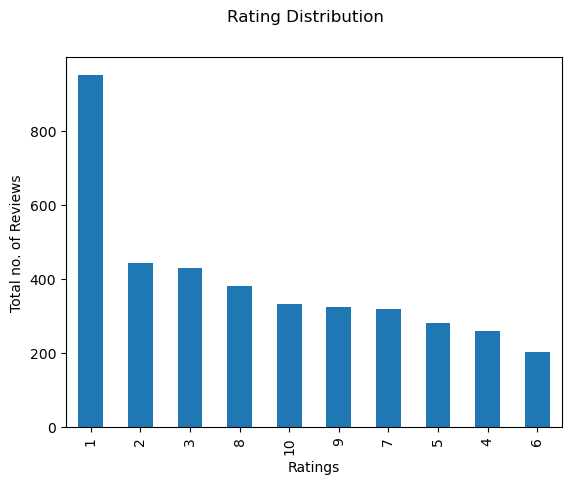

In [233]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("Total no. of Reviews")
plt.suptitle("Rating Distribution")

In [297]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings.columns = ['total_counts']

# Reset index to ensure ratings are in a separate column
df_ratings = df_ratings.reset_index()

#percentage value
pct_values = ((df_ratings.stars.values/ df_ratings.stars.values.sum()) *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

# #resetting index as we do not want to confuse between the index and the rating values
# df_ratings = df_ratings.reset_index()

# renaming columns
df_ratings.rename(columns={'stars':'Stars'}, inplace=True)
df_ratings

Stars  total_counts  pct_values
0      1           950        1.82
1      2           443        3.64
2      3           428        5.45
3      8           381       14.55
4     10           331       18.18
5      9           325       16.36
6      7           318       12.73
7      5           280        9.09
8      4           258        7.27
9      6           201       10.91

/var/folders/48/psb2zmrd3z3fwqqy8md0ym2m0000gn/T/ipykernel_60968/336978590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barChart = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data = df_ratings, linewidth=0, palette = colors)


Text(0.5, 1.0, 'Count of ratings')

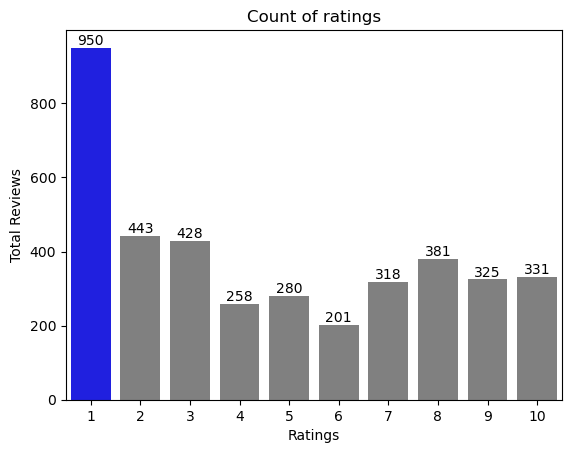

In [337]:
colors = ['Blue' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
barChart = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data = df_ratings, linewidth=0, palette = colors)

for container in barChart.containers:
    barChart.bar_label(container)


barChart.set_xlabel("Ratings")
barChart.set_ylabel("Total Reviews")
barChart.set_title("Count of ratings")

In [339]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

75 unique countries


### Country wise analysis

In [362]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   This time British Airways ...      5  2025-03-07   
1  ✅ Trip Verified |   The seats were excellent, ...      9  2025-02-28   
2  ✅ Trip Verified |   After the nightmare of get...      9  2025-02-27   
3  ✅ Trip Verified |   Prior to boarding a gate a...      5  2025-02-21   
4  ✅ Trip Verified |   I flew from Amsterdam to L...      3  2025-02-18   

          country  verified                                             corpus  
0  United Kingdom      True  time british airway managed get everything rig...  
1  United Kingdom      True  seat excellent feel much room official seat pi...  
2  United Kingdom      True  nightmare getting triple security nairobi airp...  
3  United Kingdom      True  prior boarding gate agent seemed pick elderly ...  
4     Netherlands      True  flew amsterdam la vega layover heathrow novemb...

country  total_reviews
0  United Kingdom           2447
1   United States            448
2       Australia            166
3          Canada            124
4         Germany             67

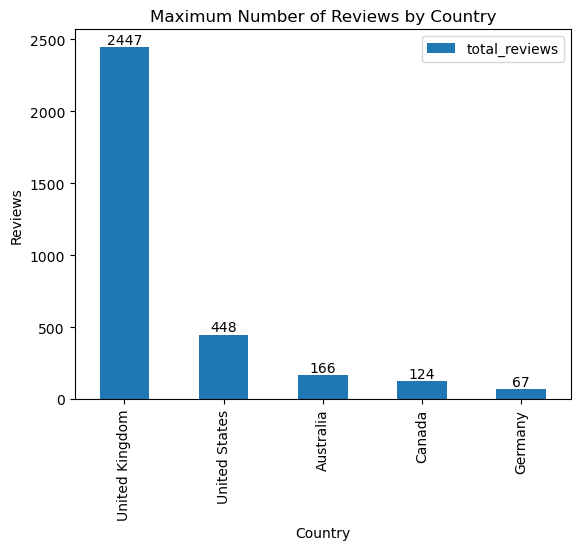

In [501]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns = {'count':'total_reviews'}, inplace=True)

barPlt = df_country_review.plot(kind="bar", x='country')

# Add data labels on top of each bar
barPlt.bar_label(barPlt.containers[0])

barPlt.set_xlabel("Country")
barPlt.set_ylabel("Reviews")
barPlt.set_title("Maximum Number of Reviews by Country")
df_country_review

       country  avg_rating
42     Morocco       10.00
14  Costa Rica        9.00
19     Ecuador        9.00
12       Chile        9.00
48      Panama        8.00
..         ...         ...
28     Iceland        1.67
6      Bermuda        1.50
57     Senegal        1.00
35      Jordan        1.00
73     Vietnam        1.00

[74 rows x 2 columns]


/var/folders/48/psb2zmrd3z3fwqqy8md0ym2m0000gn/T/ipykernel_60968/2647795821.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Morocco'),
  Text(1, 0, 'Costa Rica'),
  Text(2, 0, 'Ecuador'),
  Text(3, 0, 'Chile'),
  Text(4, 0, 'Panama'),
  Text(5, 0, 'Oman'),
  Text(6, 0, 'Trinidad & Tobago'),
  Text(7, 0, 'Saint Kitts and Nevis'),
  Text(8, 0, 'Dominican Republic'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Russian Federation'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'China'),
  Text(13, 0, 'Hungary'),
  Text(14, 0, 'Slovakia')])

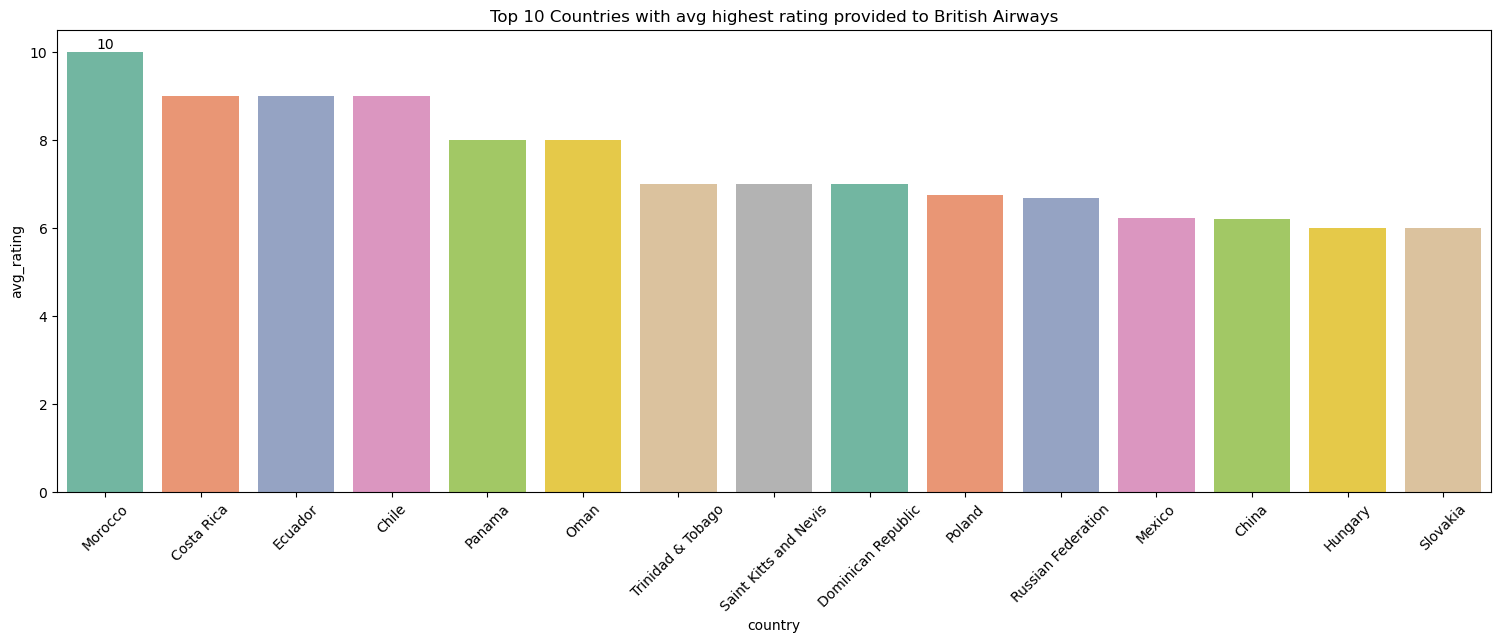

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'stars' column to numeric (if not already)
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Group by country and calculate the mean stars rating
df_country_rating = pd.DataFrame(
    df.groupby('country', as_index=False)['stars']
    .mean().round(2)
    .sort_values(by='stars', ascending=False)
)

df_country_rating.rename(columns = {'stars':'avg_rating'}, inplace=True)
# Display result
print(df_country_rating)

fig, ax = plt.subplots(figsize=(18.5, 6))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:15], palette="Set2")

ax1.bar_label(ax1.containers[0])
ax1.set_title("Top 10 Countries with avg highest rating provided to British Airways")


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

### Time Series Analysis

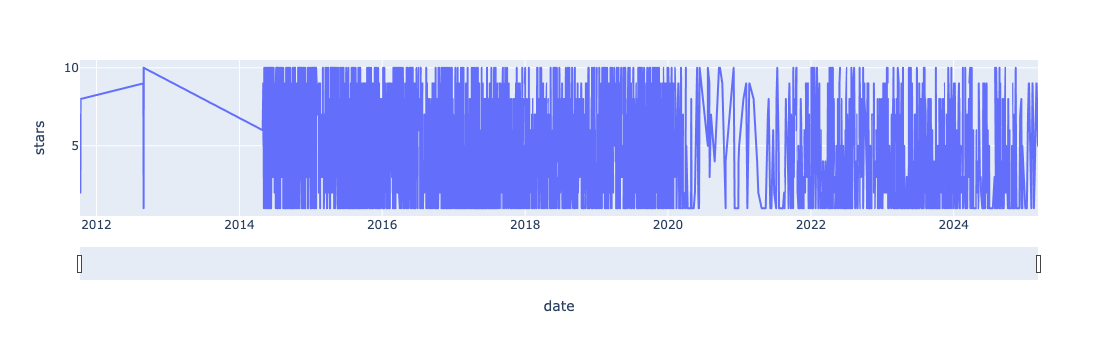

In [506]:
df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Word Frequency

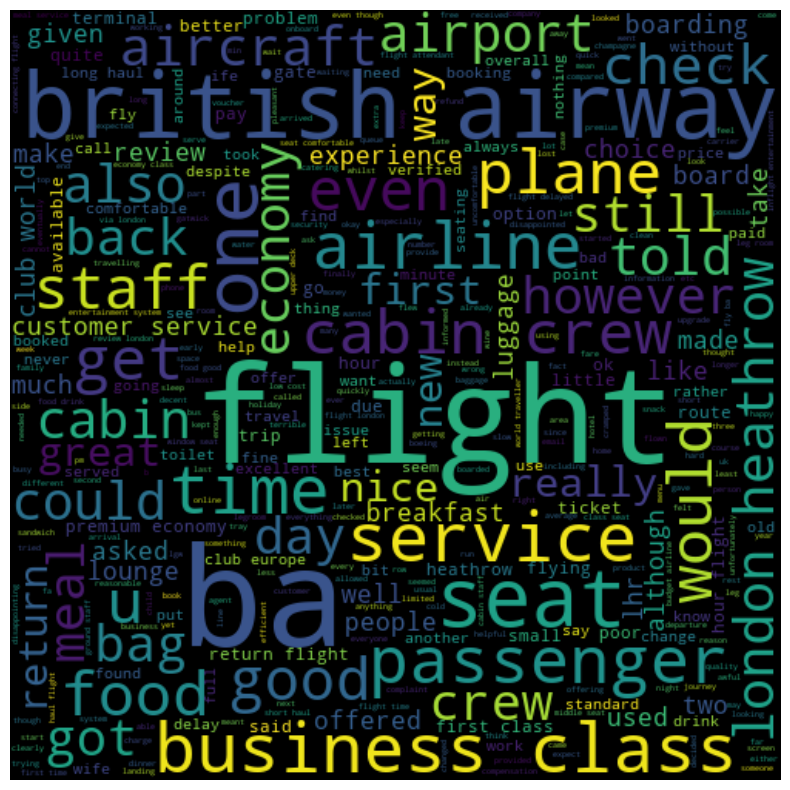

In [514]:
import nltk
from nltk.corpus import stopwords

#Start with one review
review = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

wcld = WordCloud(height=500, width=500, max_font_size=90, max_words=500, stopwords=stopwords).generate(review)

plt.imshow(wcld, interpolation='bilinear')
plt.axis("off")
plt.show()

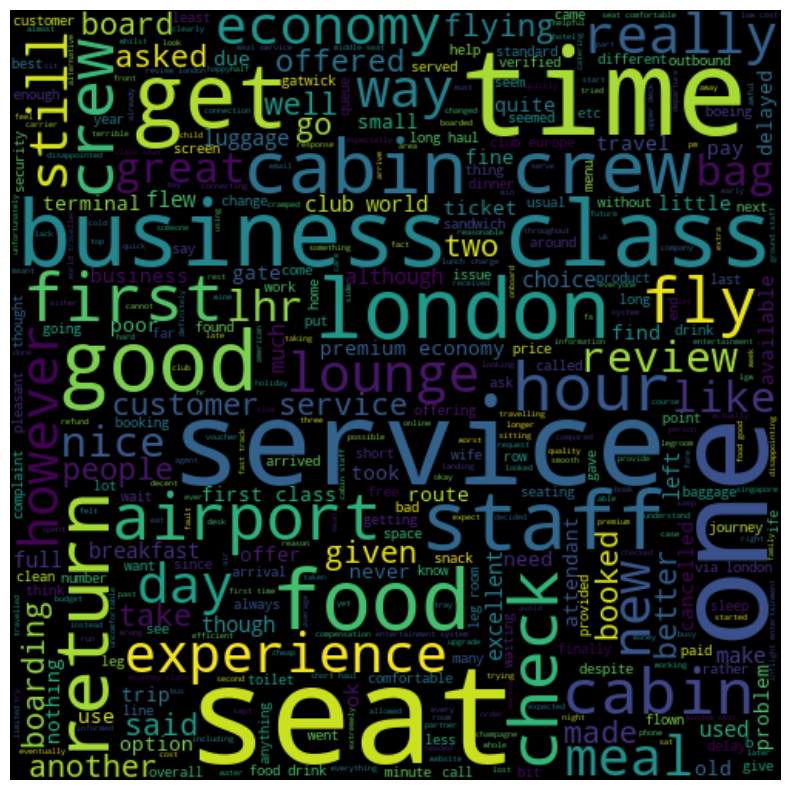

In [518]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger","got", "u","get"
                  "london", "heathrow", "aircraft", "could","even", "would", "back"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=90, max_words=400, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

seat          4700
service       3165
time          2611
food          2451
crew          2362
good          2164
cabin         2155
class         2048
hour          2044
business      1697
staff         1654
economy       1469
check         1392
drink         1267
meal          1226
return        1177
club          1166
lounge        1158
boarding      1080
experience    1058
dtype: int64


/var/folders/48/psb2zmrd3z3fwqqy8md0ym2m0000gn/T/ipykernel_60968/42801120.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'club'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

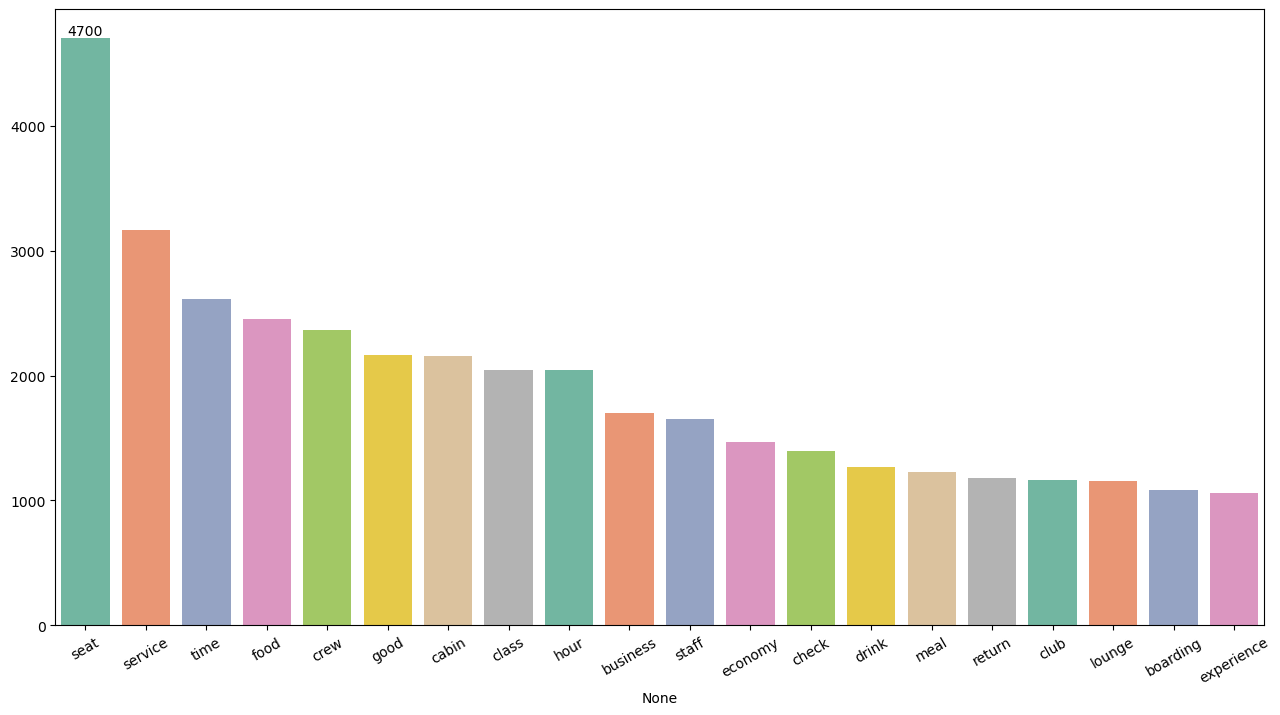

In [525]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text  #scikitlearn
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]
nlp_words = FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))
print(all_fdist)
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15.6, 8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette="Set2")
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)


### word Frequency with N-Gram

<Axes: >

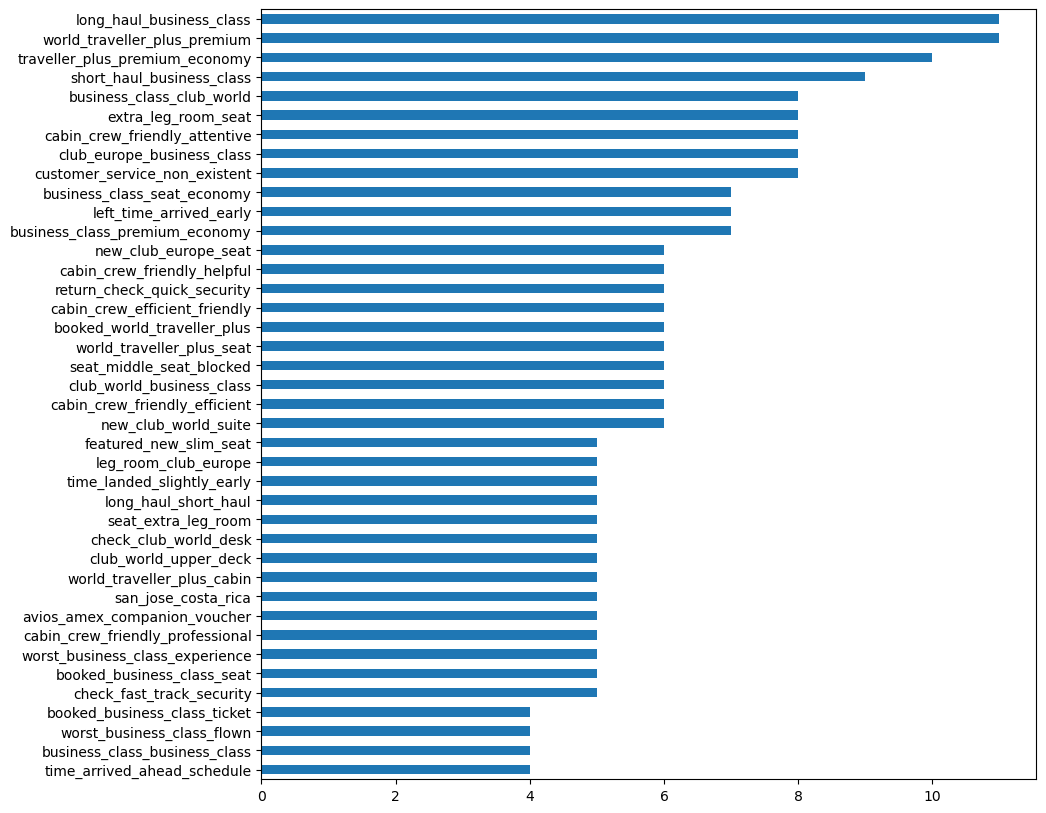

In [534]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<Axes: >

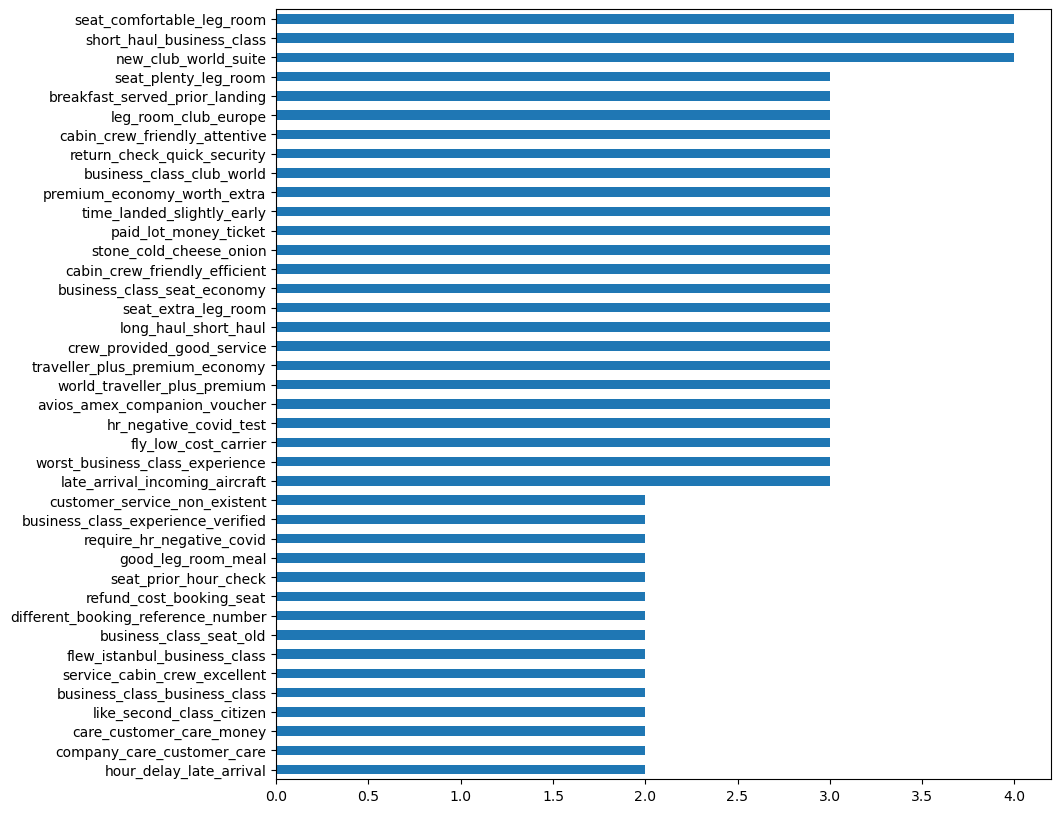

In [536]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

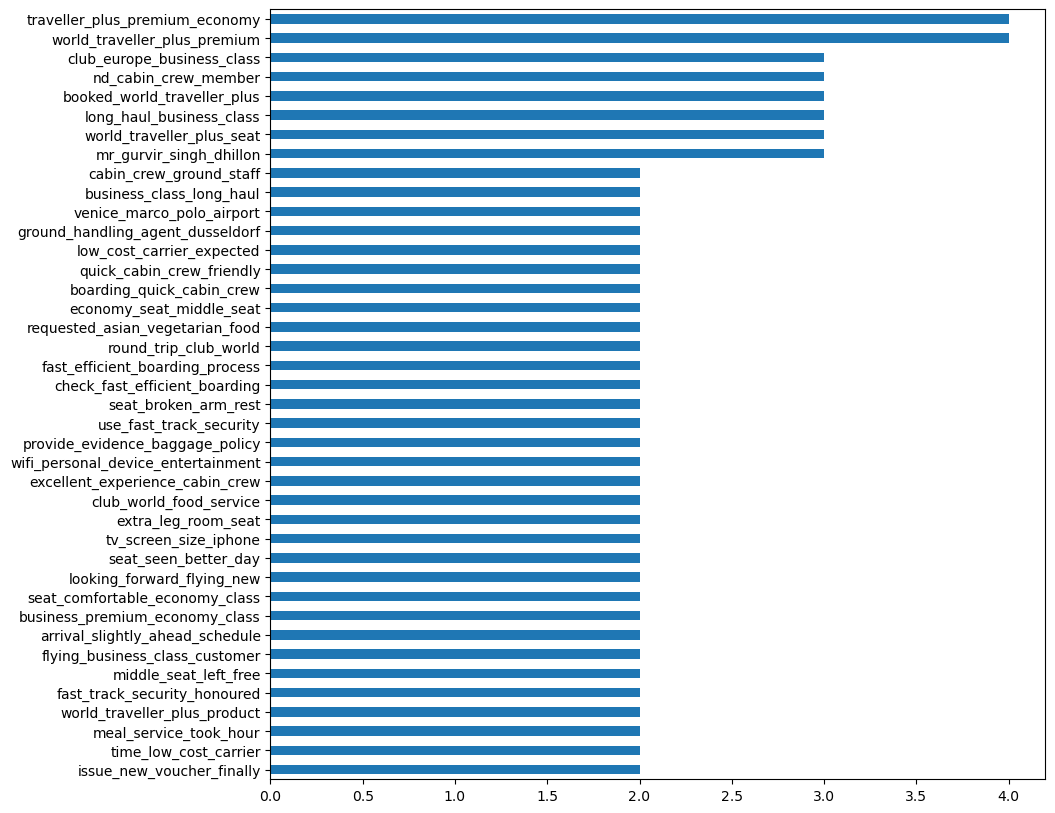

In [538]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

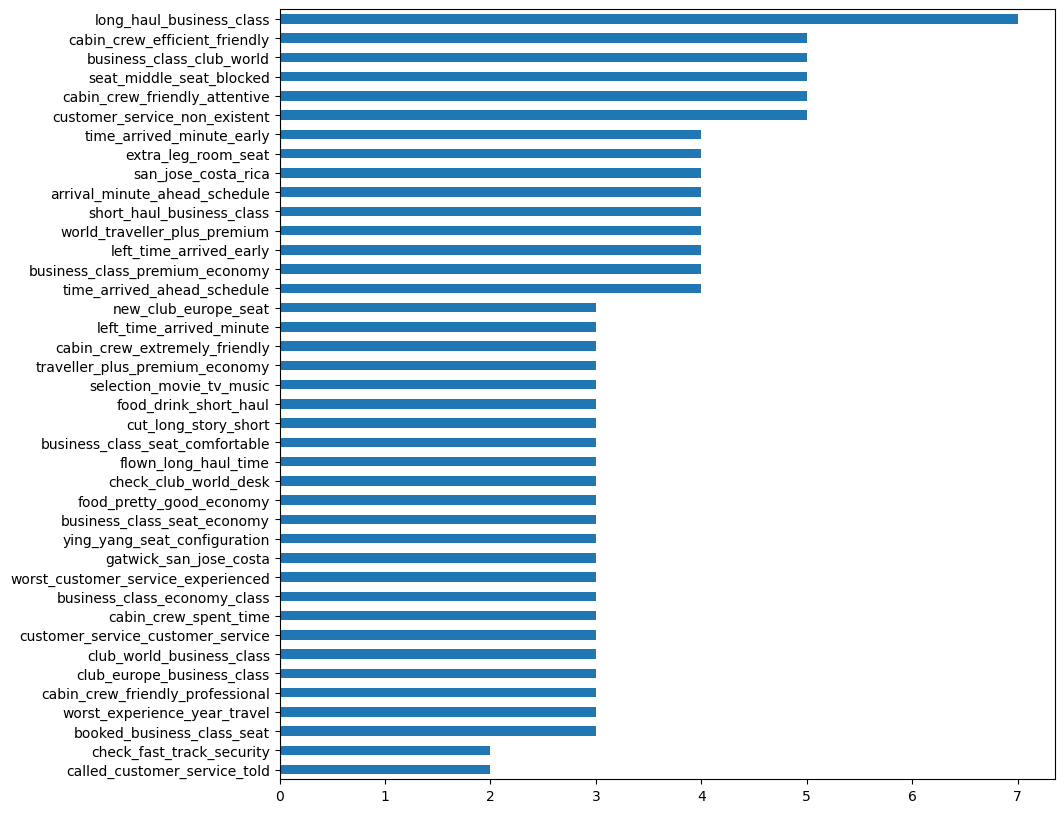

In [540]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

#### Check if text is positive or negative

In [545]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 7.0 MB/s eta 0:00:00


In [555]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    wrd= TextBlob(df.corpus[i])
    polarity  = wrd.sentiment.polarity
    subjectivity  = wrd.sentiment.subjectivity
    df['polarity'][i] = polarity

In [557]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2675 number of reviews between -0.2 and 0.2 polarity score
1565 number of reviews between -0.1 and 0.1 polarity score


In [561]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/user/nltk_data...


In [563]:
df.label.value_counts()

label
 1    2479
-1    1304
 0     132
Name: count, dtype: int64

## Topic Modeling with LDA


 Latent Dirichlet Allocation,
 The topics then generate words based on their probability distribution

In [573]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [577]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat            64.0         class          1119.5        flight   
1        flight            61.6      business           957.0            ba   
2          food            26.4          seat           848.5          hour   
3         could            26.2            ba           619.3       british   
4          time            23.3       service           298.2        airway   
5          hour            21.7        flight           289.8       airline   
6         child            21.4         first           284.0          time   
7         would            20.5       economy           279.1          told   
8          good            19.9       airline           260.1         would   
9         check            17.5        airway           258.5        london   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          2639.4          seat          1235.4            ba           733.9   
1          1326.3        flight           922.9        flight           731.0   
2           830.0       economy           630.6       service           548.9   
3           679.0          food           524.0      customer           404.3   
4           665.9       british           500.4        london           312.3   
5           622.4        airway           492.6       british           308.4   
6           573.4         cabin           408.9        airway           305.7   
7           568.5       airline           399.7       luggage           297.5   
8           533.5          meal           385.9          hour           291.2   
9           528.7            ba           376.1         staff           290.6   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0   retrofitted             5.1        flight          3436.4         check   
1      earliest             5.1          seat          2072.5      boarding   
2         point             5.1            ba          1972.1           bag   
3     officious             5.1          good          1845.2        flight   
4       spinach             5.0          crew          1784.4            ba   
5            kg             4.8          food          1617.0          gate   
6        called             4.7       service          1505.2         staff   
7         cream             4.6         cabin          1392.4       luggage   
8       pretzel             4.2          time          1278.8      security   
9     tolerable             4.1          club           984.9          time   

  Topic 7 weights  
0           589.2  
1           497.3  
2           464.8  
3           397.8  
4           326.6  
5           289.2  
6           272.7  
7           229.5  
8           210.5  
9           191.4

## Topic modeling with NMF
##### NMF is often used in topic modeling, which means discovering the main themes in a large collection of documents.
##### Non-Negative Matrix Factorization (NMF)

In [582]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.04403168, 0.03866625],
       [0.06499368, 0.00499754],
       [0.04319829, 0.03706571],
       ...,
       [0.10200374, 0.17202448],
       [0.02515522, 0.03252296],
       [0.09128581, 0.        ]])

In [592]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            24.5        flight            21.3
1            ba            14.1            ba             7.1
2         class            10.9          hour             4.9
3          food             8.8          time             4.0
4      business             8.6        london             3.5
5       service             8.6       british             3.4
6         cabin             8.3        airway             3.4
7          crew             7.9       service             3.3
8          good             7.7         would             3.0
9       economy             6.4           day             2.6